In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
import datetime

In [2]:
#Get Path
os.getcwd()
basepath = os.getcwd()
print(basepath)
lis_dir = os.listdir()
print(lis_dir)

C:\Users\Tiki\Documents\Sprinboard2\Capstone_cars
['.ipynb_checkpoints', '575_1100_compressed_data.csv', '575_1100_compressed_data.csv.zip', '62920_1026452_bundle_archive.zip', 'auto1.ipynb', 'auto1_datawrangling.ipynb', 'auto2.ipynb', 'auto2_Combining Data.ipynb', 'auto3.ipynb', 'autodata3_EDA.ipynb', 'correlation.png', 'data', 'figures']


In [3]:
# Create the list of file names: filenames
file ='auto_data_complete.csv'
sub_file = 'data'
print('p')
file_name_path = os.path.join(basepath, sub_file, file)
print('y')
auto_data= pd.read_csv(file_name_path)
#Open data
auto_data.head(5)

p
y


id      region  price    year manufacturer                 model  \
0  7088744126  greensboro   9500  2011.0       jaguar                    xf   
1  7093461424      denver   7995  2010.0    chevrolet    silverado 1500 4wd   
2  7088708344  greensboro  15300  2015.0        honda  accord lx-s coupe 2d   
3  7076226877    syracuse  10950  2011.0        buick        lucerne cxl v6   
4  7076224988    syracuse   9400  2011.0          bmw                    x5   

   condition  cylinders fuel  odometer  ... state      lat      long   age  \
0  excellent        NaN  gas   85000.0  ...    nc  36.1032  -79.8794   9.0   
1  excellent        8.0  gas  194050.0  ...    co  39.8302 -105.0370  10.0   
2       good        NaN  gas   54296.0  ...    nc  36.0700  -79.8200   5.0   
3  excellent        6.0  gas   43418.0  ...    ny  43.1226  -76.1284   9.0   
4       good        6.0  gas  145000.0  ...    ny  43.1707  -76.0962   9.0   

                 modelx                              mmy_a          model2  \
0                    xf                     jaguar xf 2011             NaN   
1    silverado 1500 4wd  chevrolet silverado 1500 4wd 2010  silverado 1500   
2  accord lx-s coupe 2d    honda accord lx-s coupe 2d 2015     accord lx-s   
3        lucerne cxl v6          buick lucerne cxl v6 2011     lucerne cxl   
4                    x5                        bmw x5 2011             NaN   

                          mmy_a2 Category  MSRP  
0                            NaN    Sedan   NaN  
1  chevrolet silverado 1500 2010      NaN   NaN  
2         honda accord lx-s 2015      NaN   NaN  
3         buick lucerne cxl 2011      NaN   NaN  
4                            NaN      SUV   NaN  

[5 rows x 28 columns]

In [4]:
#smaller dataset
auto_data['resid']= auto_data['price']/auto_data['MSRP']
auto_data['Category2']= auto_data['Category'].str.strip().str.split(', ').str[0]
z= auto_data[['Category', 'type', 'cylinders', 'condition','fuel', 'size', 'drive', 'title_status', 'odometer', 'price', 'MSRP', 'age', 'resid']]
z= z[z.price<100000]
z1 = z.dropna()
z1.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5312 entries, 14 to 142131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      5312 non-null   object 
 1   type          5312 non-null   object 
 2   cylinders     5312 non-null   float64
 3   condition     5312 non-null   object 
 4   fuel          5312 non-null   object 
 5   size          5312 non-null   object 
 6   drive         5312 non-null   object 
 7   title_status  5312 non-null   object 
 8   odometer      5312 non-null   float64
 9   price         5312 non-null   int64  
 10  MSRP          5312 non-null   float64
 11  age           5312 non-null   float64
 12  resid         5312 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 581.0+ KB


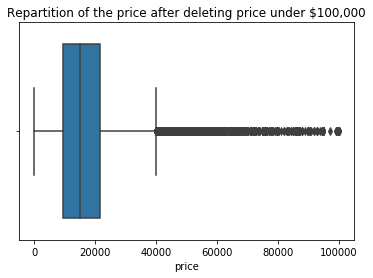

In [5]:
#price
price = auto_data.price[(auto_data.price >= 100) & (auto_data.price <= 100000)]
sns.boxplot(price)
plt.title("Repartition of the price after deleting price under $100,000")
plt.show()

### Box Plots

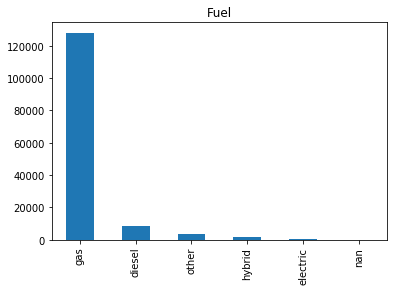

In [6]:
#see Fuel
auto_data.fuel.value_counts(dropna=False).plot.bar()
plt.title("Fuel")
plt.show()

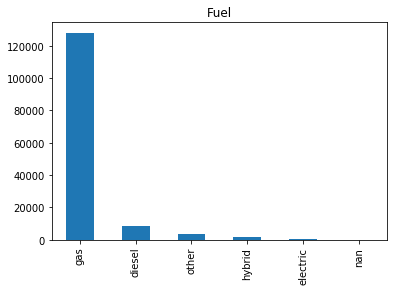

In [7]:
#see Fuel
auto_data.fuel.value_counts(dropna=False).plot.bar()
plt.title("Fuel")
plt.show()

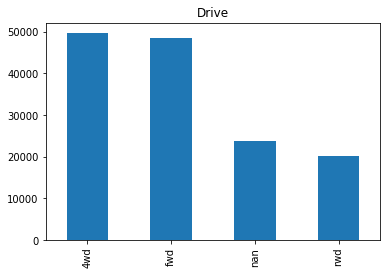

In [8]:
#See drive

auto_data.drive.value_counts(dropna=False).plot.bar()
plt.title("Drive")
plt.show()


### Histograms

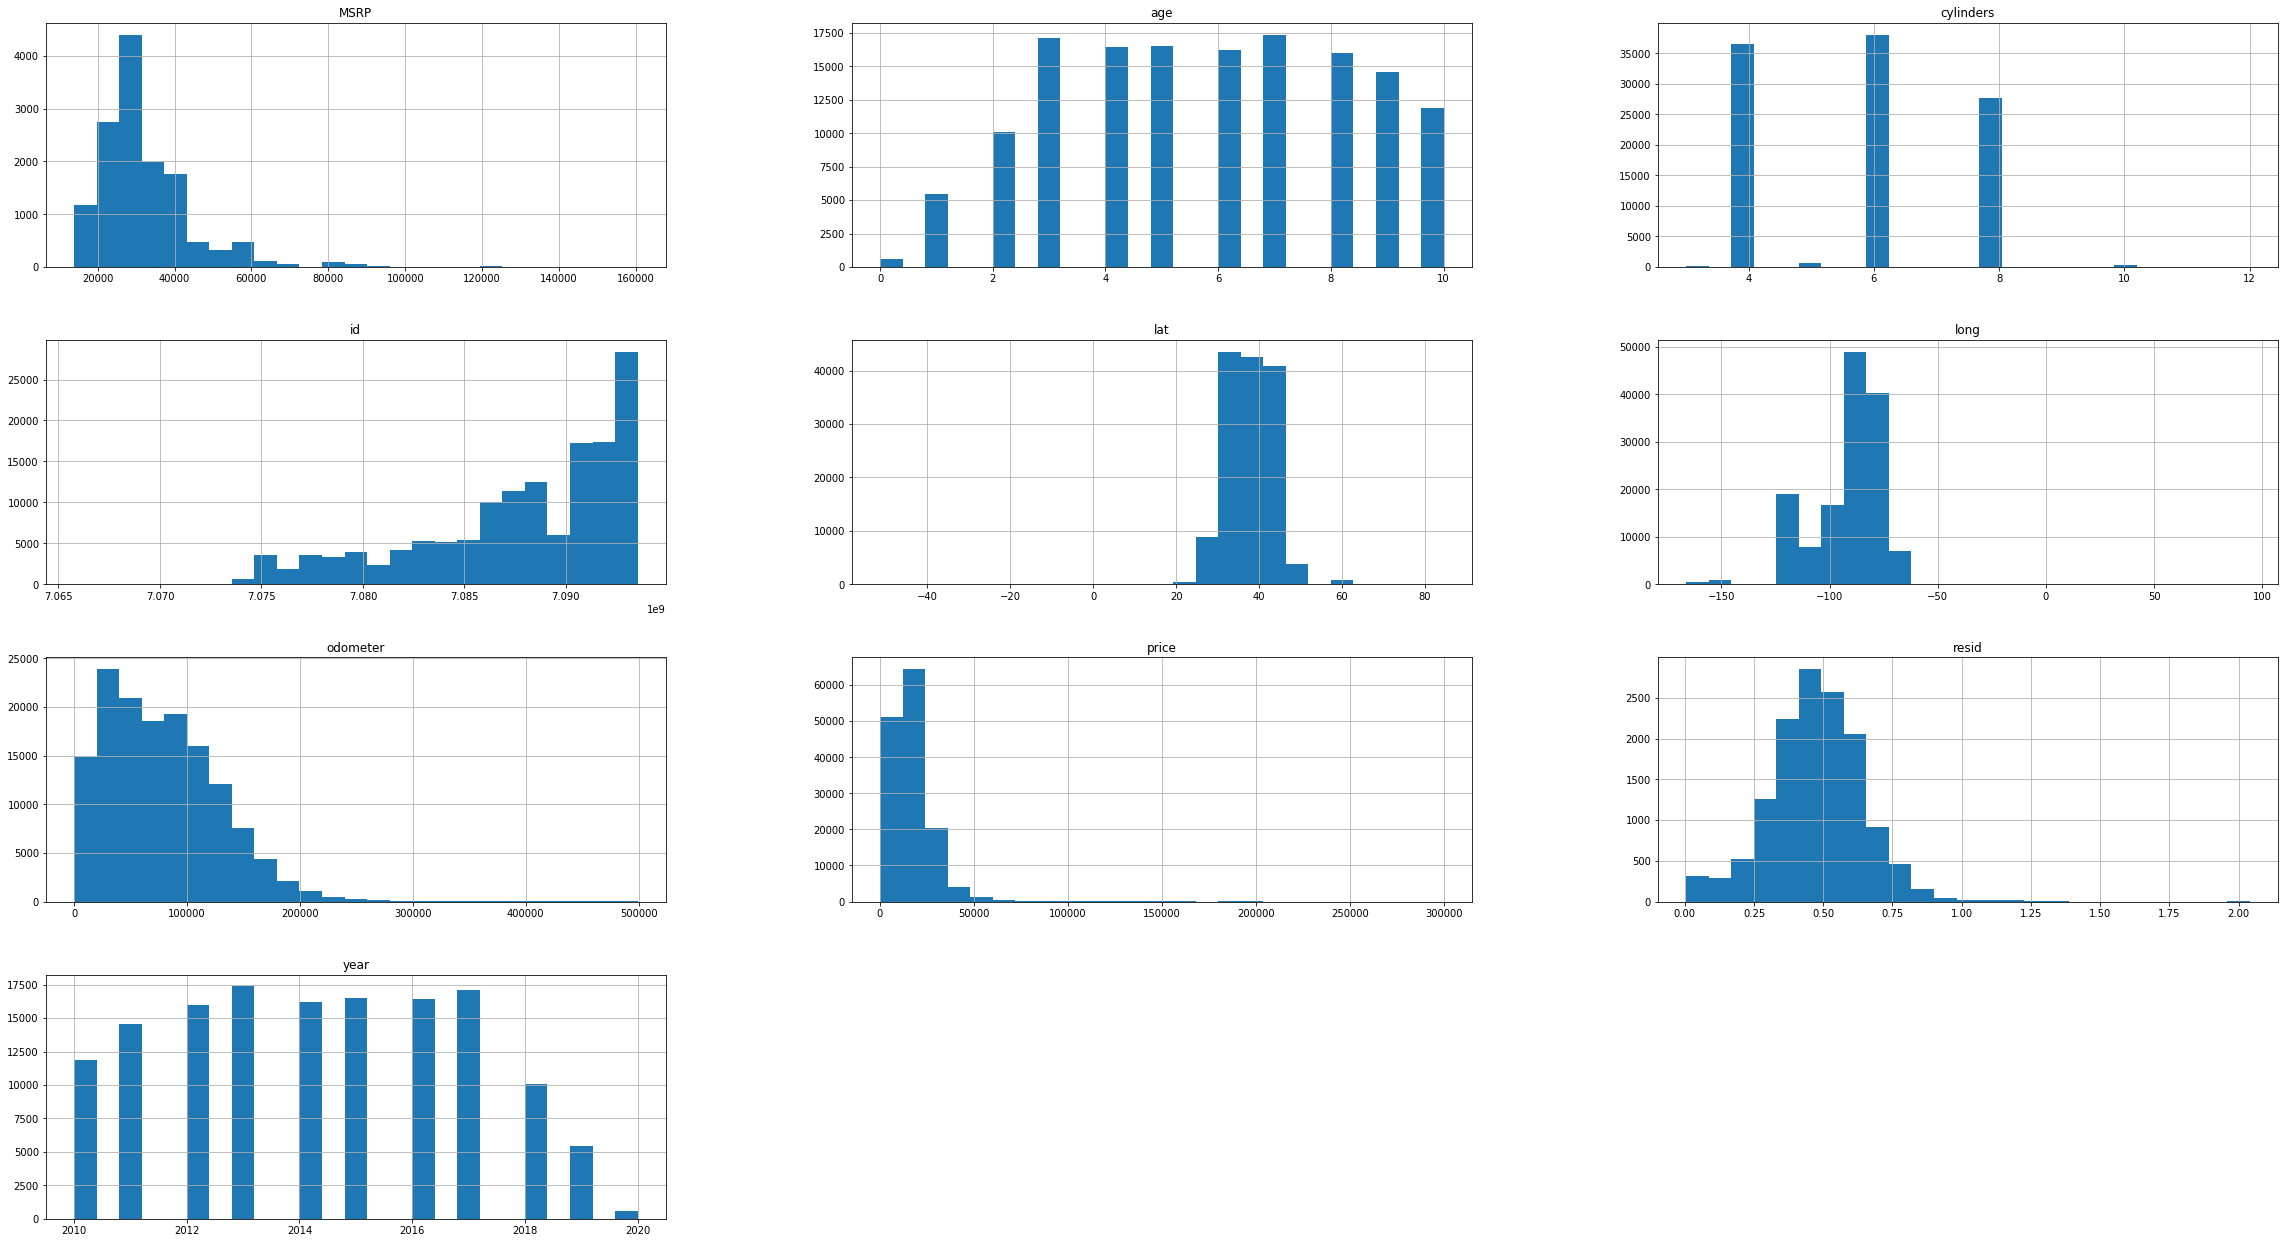

In [9]:
#histogram data
hist = auto_data.hist(bins=25, figsize=(40,22))

#much of the data skews left except for prices and days open

### Heat Map

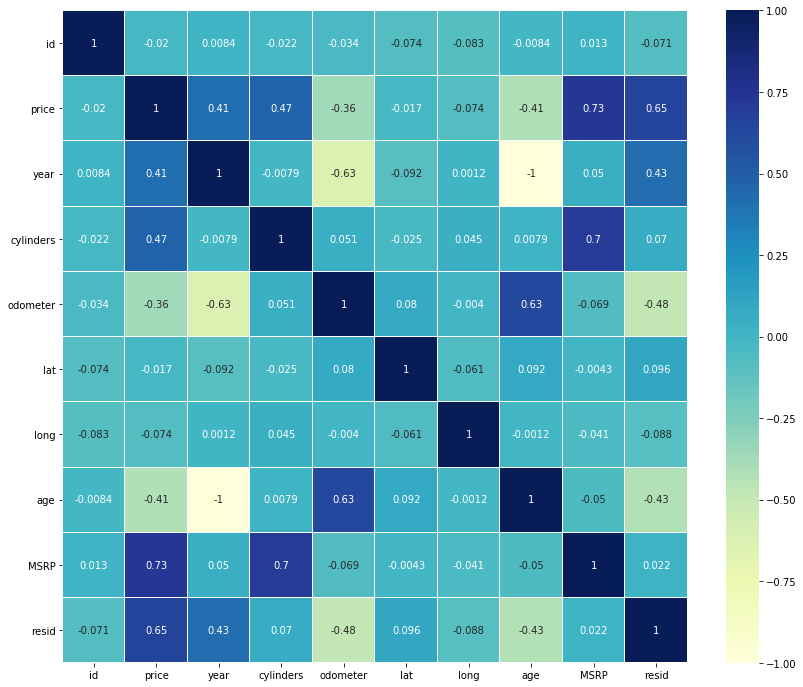

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(auto_data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.savefig('correlation',bbox_inches='tight')

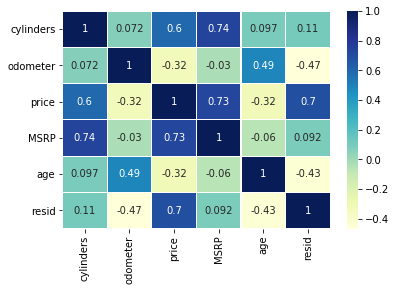

In [11]:
sns.heatmap(z1.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.savefig('correlation',bbox_inches='tight')

### Notes
High corelation linear
* Price , MSRP, 
* Price ,  cylinders
* MSRP , cylinders
* Residual,  cylinders
decent correlation 
* Price odometer
* price age
* age odometer (this does not make sense this should have stronger relationship)

### Cluster

In [12]:
auto_data.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
description      object
state            object
lat             float64
long            float64
age             float64
modelx           object
mmy_a            object
model2           object
mmy_a2           object
Category         object
MSRP            float64
resid           float64
Category2        object
dtype: object

### Pairplot

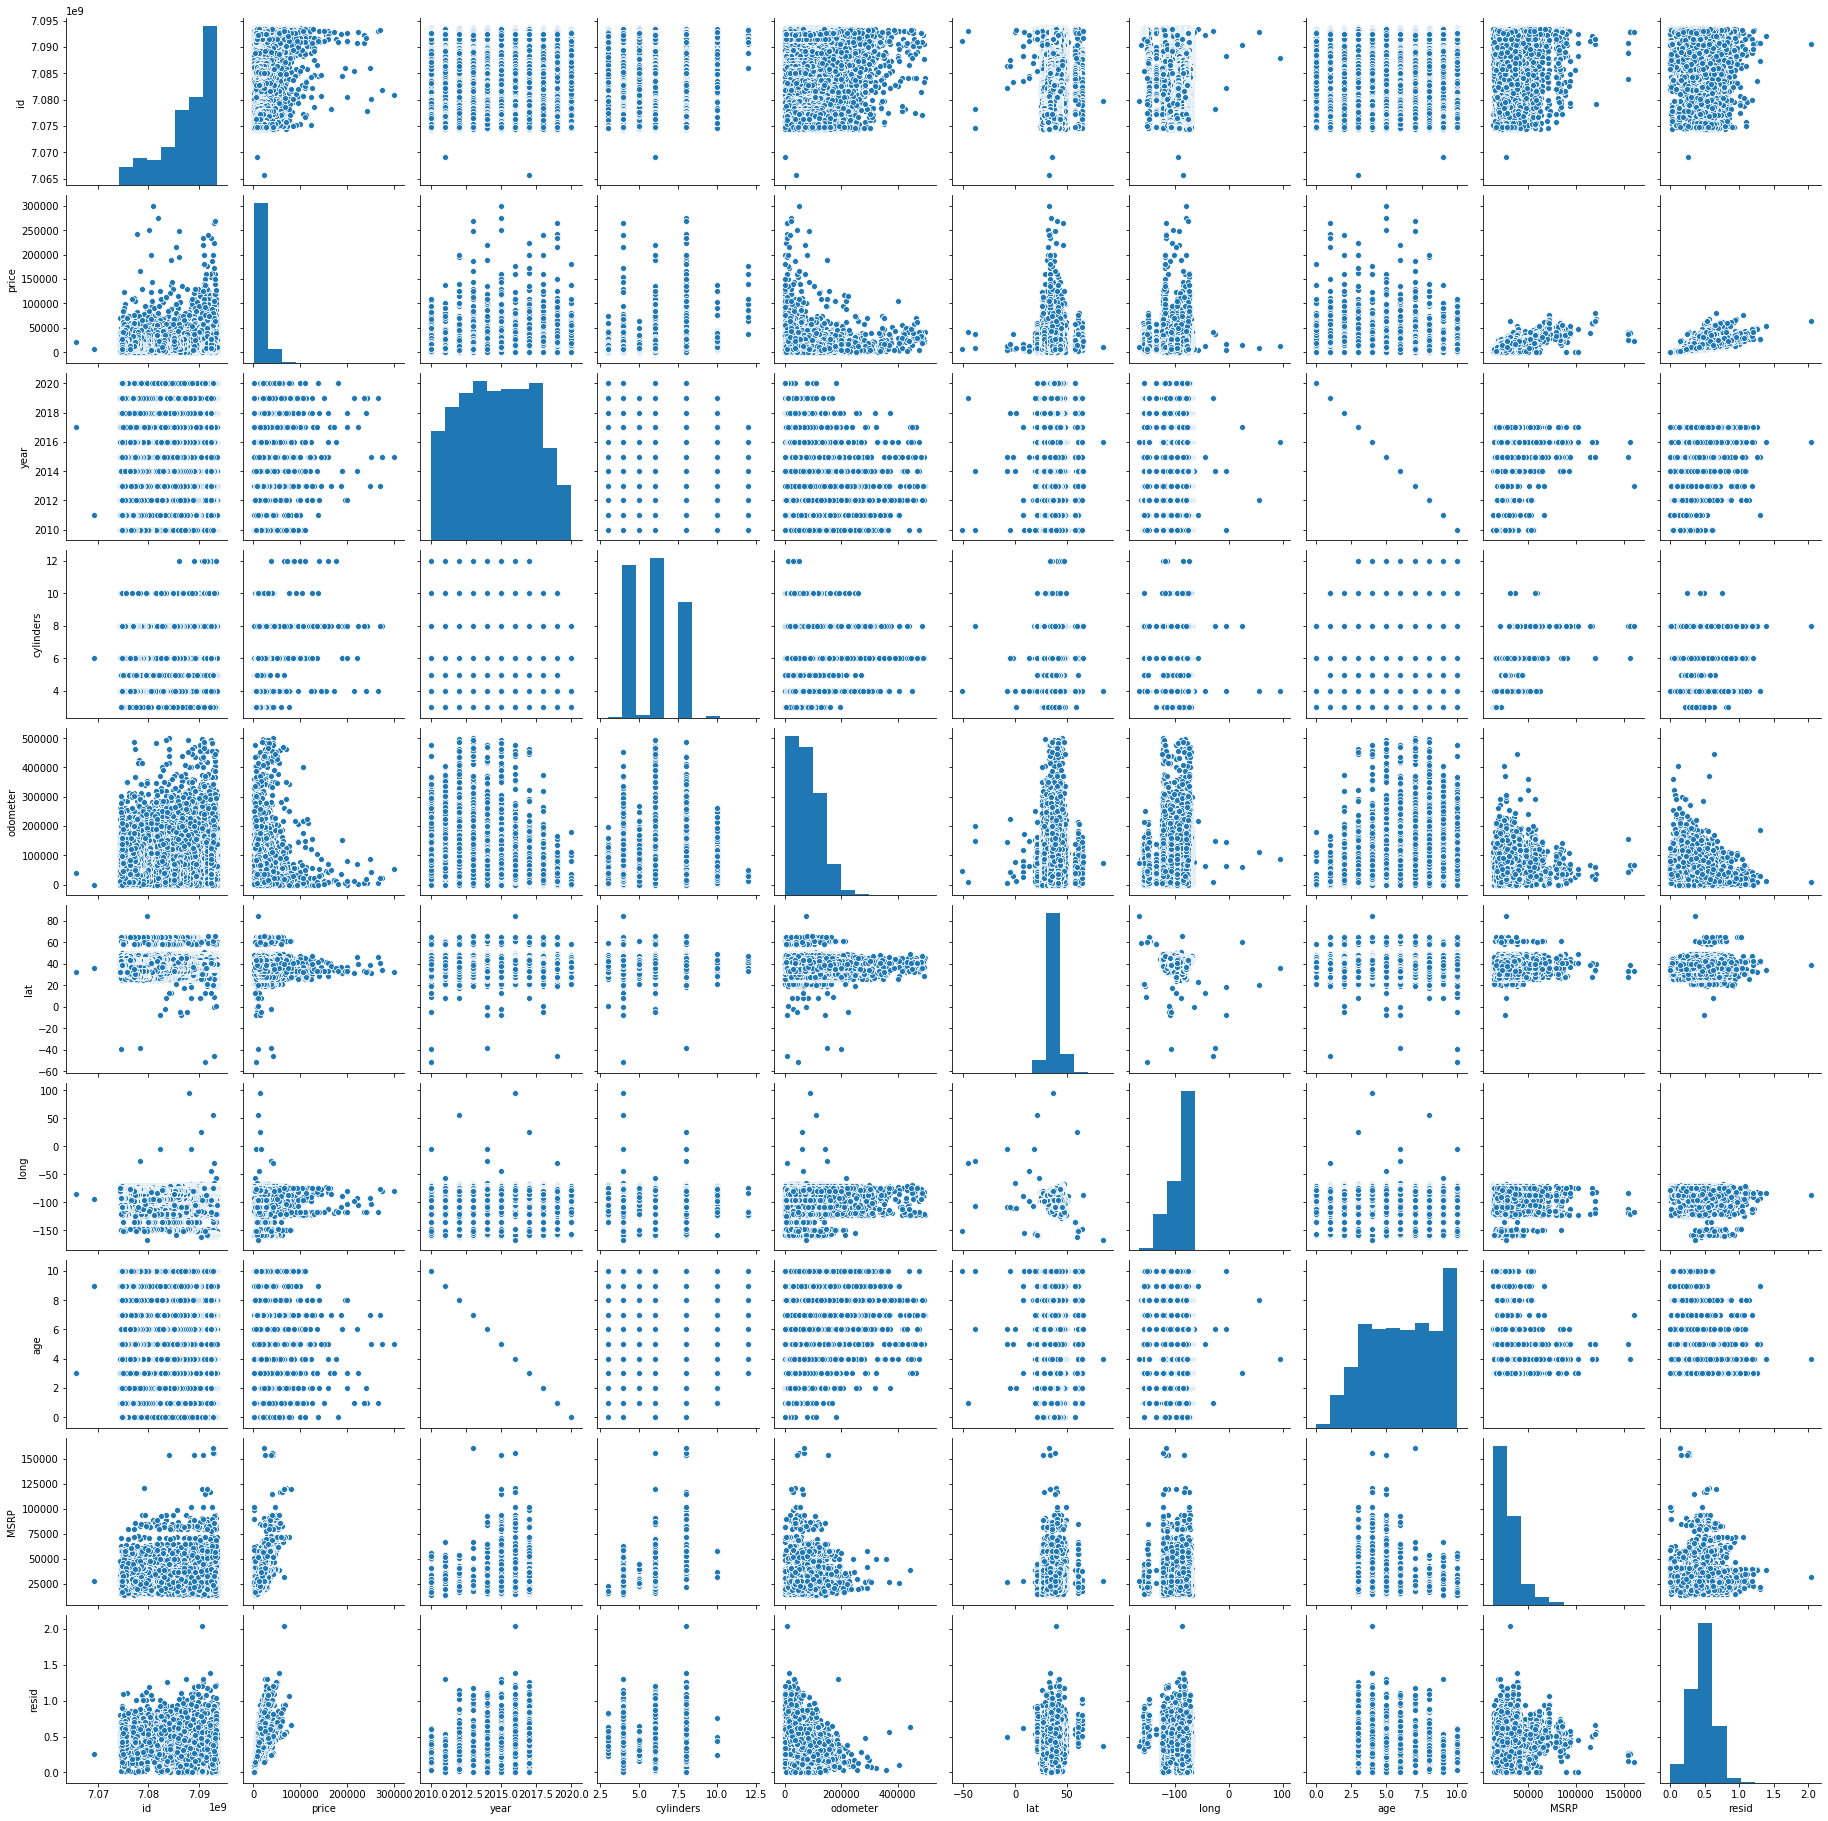

In [13]:

g2 = sns.pairplot(auto_data) #That's correlation
#note price and odometer seem to have a non linear relation ship

### Joint plot notes
* Looking at distribution there is a stronger age vs odometer relationshio then linear correlation shows. It almost looks like an inverse function
* Possibly Odometer and MSRP have an n interestin distribution
* Putting ID in makes as see what a more random or uniform disribution looks like. It is used
* Longitutue and Latitute us a dumb ass relationship but hopefully showing a lot of data obviously comes from one cluster spot. Could use an overlay map but the noise around it is the interesting one

### Violin

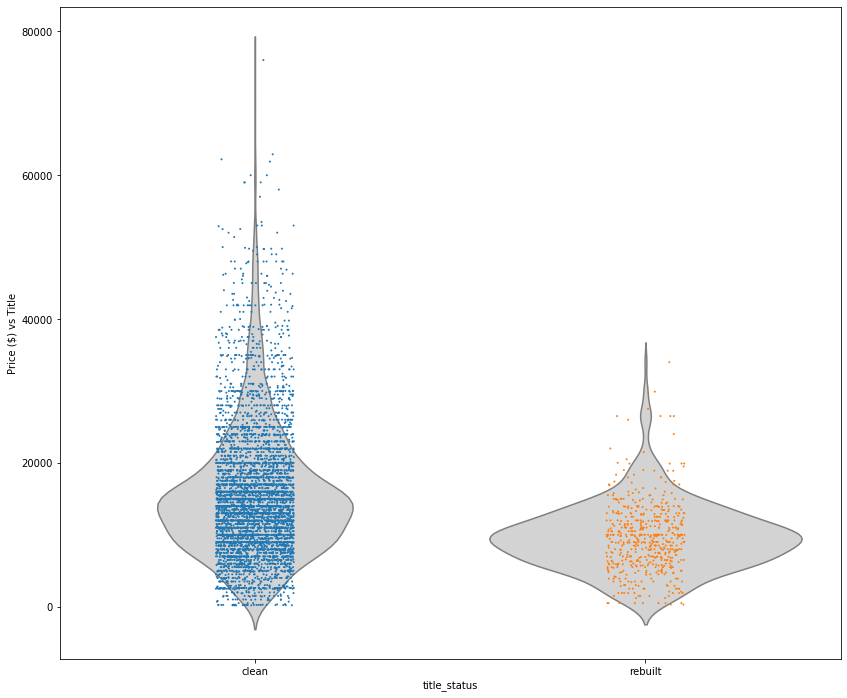

In [17]:

g= plt.figure(figsize=(14,12))
g= sns.stripplot(x="title_status", y="price", data=z1 , jitter=True, size=2 )
g= sns.violinplot(x="title_status", y="price", data=z1 ,inner=None, color='lightgray')
plt.ylabel('Price ($) vs Title')
plt.savefig('figures/PricevsTitle.png',bbox_inches='tight')
#Ok we don't need rebuilt given our parameter


In [18]:
auto_data1= auto_data[auto_data['title_status']=='clean']

Text(0, 0.5, 'Price ($) vs fuel')

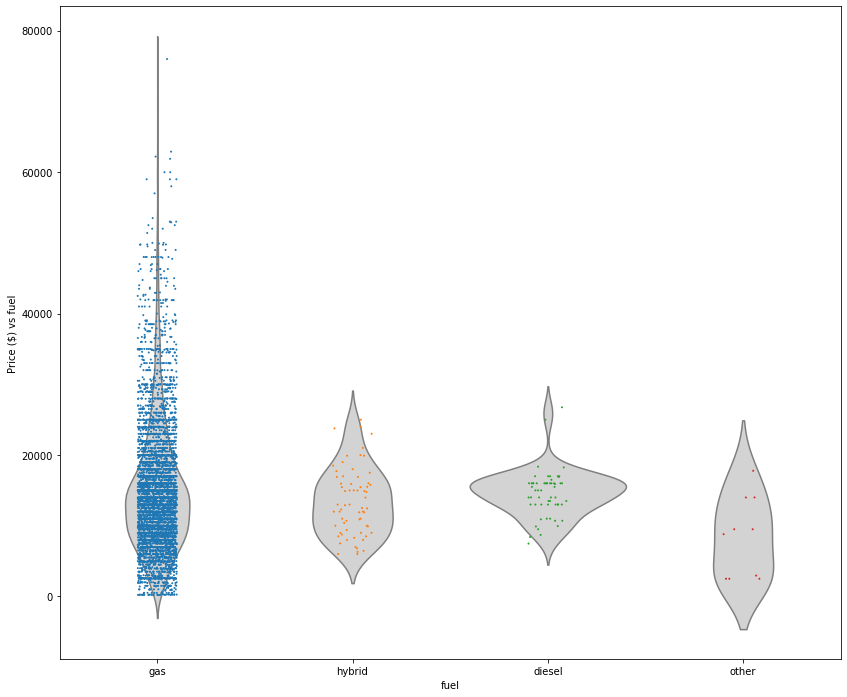

In [19]:
plt.figure(figsize=(14,12))
sns.stripplot(x="fuel", y="price", data=z1 , jitter=True, size=2 )
sns.violinplot(x="fuel", y="price", data=z1 ,inner=None, color='lightgray')
plt.ylabel('Price ($) vs fuel')

### Notes Fuel
* A lot more data in gas then in others.
*  hybrid halmost look like it has a central point and then a classic long tail disribution
* On the flip side desiel is not a long but it's central point appears higher. 


Text(0, 0.5, 'cylinders ($) vs fuel')

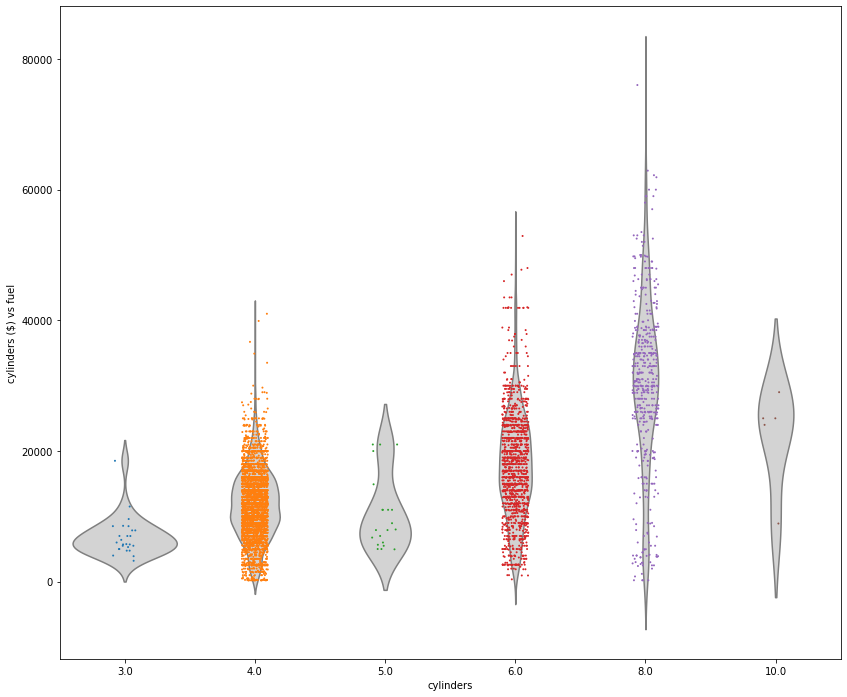

In [20]:
plt.figure(figsize=(14,12))
sns.stripplot(x="cylinders", y="price", data=z1 , jitter=True, size=2 )
sns.violinplot(x="cylinders", y="price", data=z1 ,inner=None, color='lightgray')
plt.ylabel('cylinders ($) vs fuel')

### Swarm

In [21]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142138 entries, 0 to 142137
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            142138 non-null  int64  
 1   region        142138 non-null  object 
 2   price         142138 non-null  int64  
 3   year          142138 non-null  float64
 4   manufacturer  139154 non-null  object 
 5   model         142138 non-null  object 
 6   condition     142138 non-null  object 
 7   cylinders     103418 non-null  float64
 8   fuel          142128 non-null  object 
 9   odometer      142138 non-null  float64
 10  title_status  142132 non-null  object 
 11  transmission  142006 non-null  object 
 12  vin           103835 non-null  object 
 13  drive         118448 non-null  object 
 14  size          56919 non-null   object 
 15  type          127086 non-null  object 
 16  paint_color   118150 non-null  object 
 17  description   142136 non-null  object 
 18  stat

In [22]:
q= auto_data1[auto_data1['price']<100000]

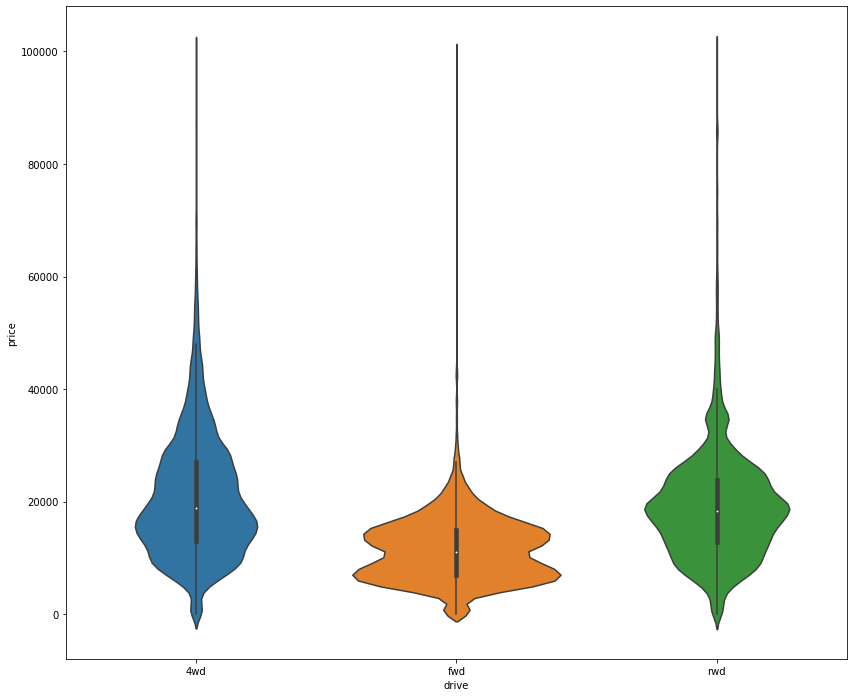

In [23]:
plt.figure(figsize=(14,12))
ax = sns.violinplot(y="price", x="drive", data=q)

## data stripped violin

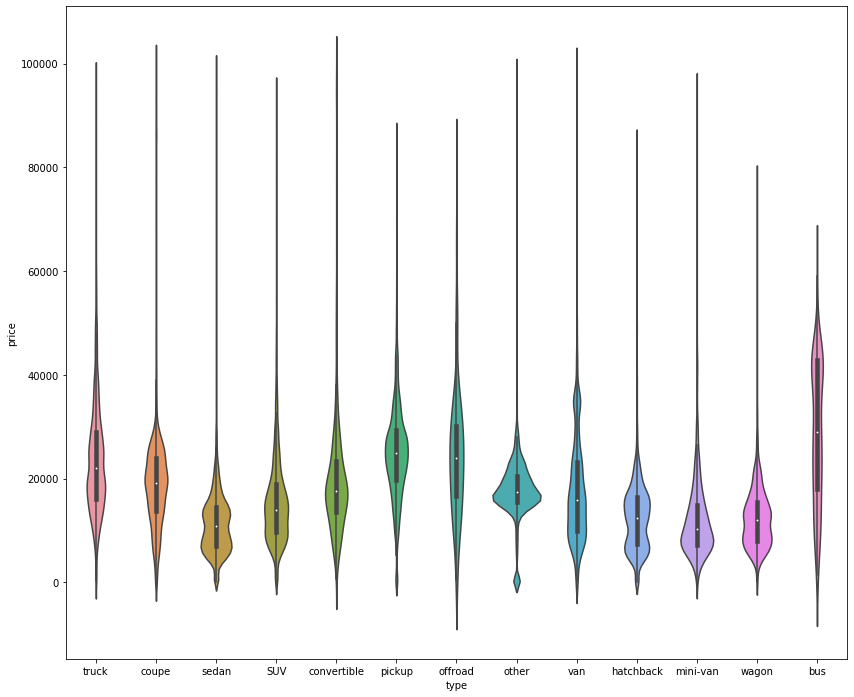

In [24]:
plt.figure(figsize=(14,12))
ax = sns.violinplot(y="price", x="type", data=q)

## data stripped violin

### Scatter

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


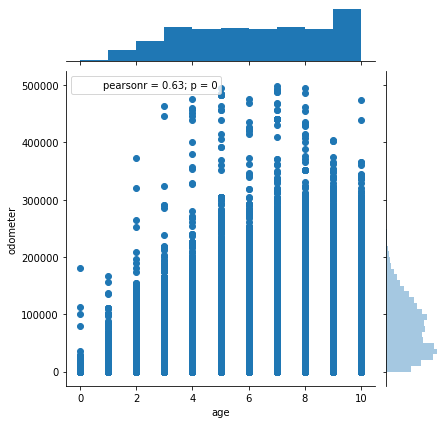

In [25]:
#scatter
from scipy.stats import pearsonr

g = sns.jointplot(x= 'age', y='odometer',data=auto_data1, stat_func=pearsonr)
_ = g.ax_marg_x.hist(auto_data['age'], bins=10)
_ = g.title = 'Price vs Mileage'
plt.show()


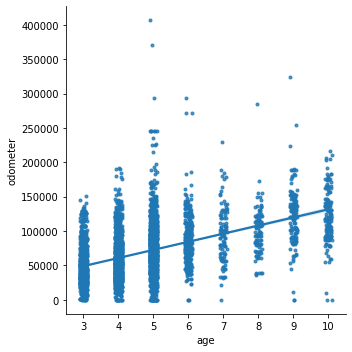

In [26]:
h= sns.lmplot(x= 'age', y='odometer',ci=95, x_jitter=0.1, markers= '.',  data=z1)
_ = h.title = 'Price vs Mileage'

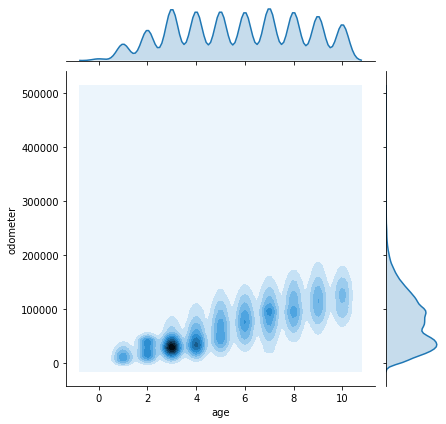

In [27]:
g = sns.jointplot(x= 'age', y='odometer',data=auto_data1, kind='kde')
_ = g.title = 'Price vs Mileage'
#ok clustered Non Linear replationsip

In [28]:
### ok clustered Non Linear replationsip

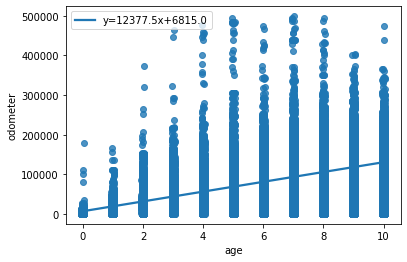

In [29]:
from scipy import stats
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(auto_data1['age'],auto_data1['odometer'])

# use line_kws to set line label for legend
ax = sns.regplot(x="age", y="odometer", data=auto_data1, x_jitter= 0.05, ci= 0.8 , line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


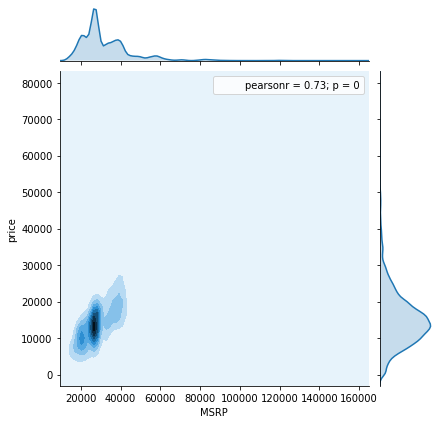

In [30]:
auto_data1= auto_data[auto_data['title_status']=='clean']
z8= auto_data1[auto_data1['price']<1000000]
gm = sns.jointplot(x= 'MSRP', y='price',data=z8, kind='kde', stat_func=pearsonr)
_ = gm.title = 'MSRP vs Price'

C:\Users\Tiki\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Tiki\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Tiki\anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


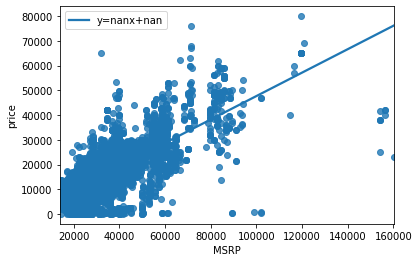

In [31]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(z8['MSRP'],z8['price'])

# use line_kws to set line label for legend
ax = sns.regplot(x="MSRP", y="price", data=z8, x_jitter= 0.05, ci= 0.8 , line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

### Longitude vs Latitude

In [32]:
auto_data1= auto_data[auto_data['title_status']=='clean']
z8= auto_data1[auto_data1['price']<1000000]
z8.columns


Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long', 'age', 'modelx', 'mmy_a', 'model2', 'mmy_a2', 'Category',
       'MSRP', 'resid', 'Category2'],
      dtype='object')

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


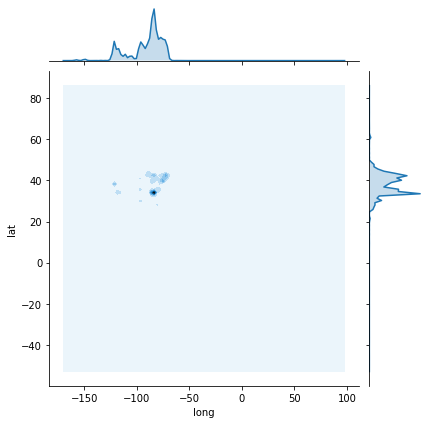

In [33]:
auto_data1= auto_data[auto_data['title_status']=='clean']
z8= auto_data1[auto_data1['price']<1000000]
g = sns.jointplot(x= 'long', y='lat', marker='.', data=z8, kind='kde')
_ = g.title = 'location'
plt.show()

## Odometer vs Price

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


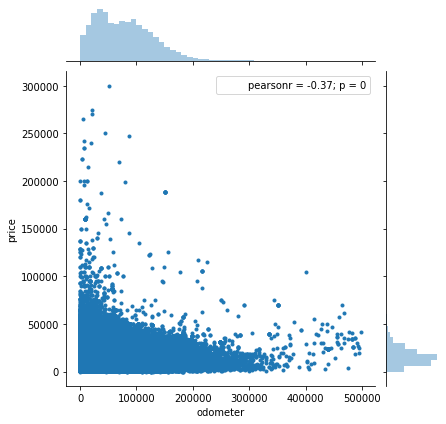

In [36]:
g = sns.jointplot(x= 'odometer', y='price', marker='.', data=z8, stat_func=pearsonr)
_ = g.title = 'Price vs Mileage'
plt.show()

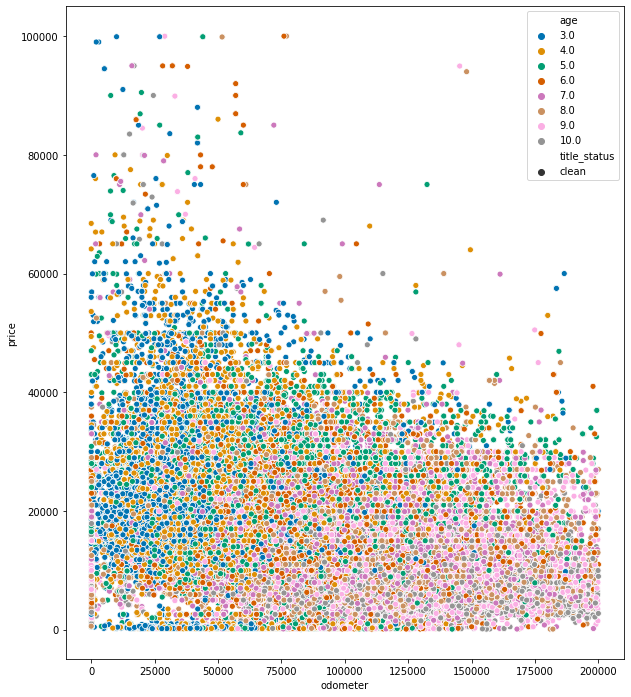

In [37]:
#scatter price vs msrp
#scatter price vs msrp
auto_data1= auto_data[auto_data['title_status']=='clean']
z2= auto_data1[auto_data1['age']<11]
z2= auto_data1[auto_data1['age']>2]
z2= z2[z2['odometer']<200000]
z2= z2[z2['price']<100000]
c = len(z1.age.unique())
palette_C = sns.color_palette("colorblind", c)

plt.figure(figsize=(10 ,12))
sns.scatterplot(x='odometer', y='price', hue= 'age', style='title_status', palette=palette_C , data=z2)
plt.show()

###  Odometer vs Residual by ....

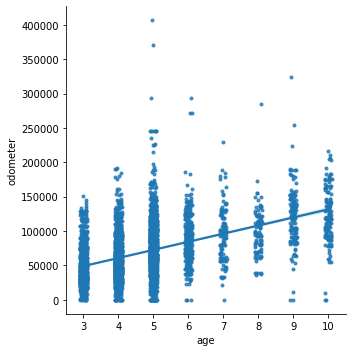

In [38]:
h= sns.lmplot(x= 'age', y='odometer',ci=95, x_jitter=0.1, markers= '.',  data=z1)
_ = h.title = 'Price vs Mileage'

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


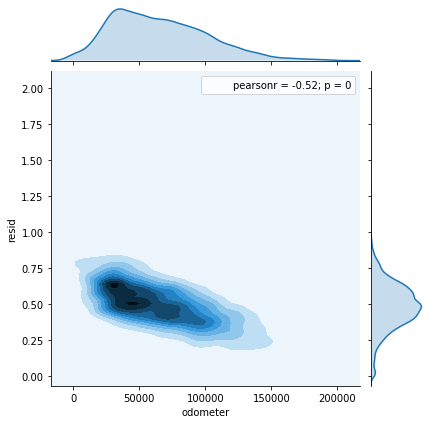

In [39]:
g = sns.jointplot(x= 'odometer', y='resid',data=z2, kind='kde', stat_func=pearsonr)
_ = g.title = 'Residual vs Mileage'
plt.show()

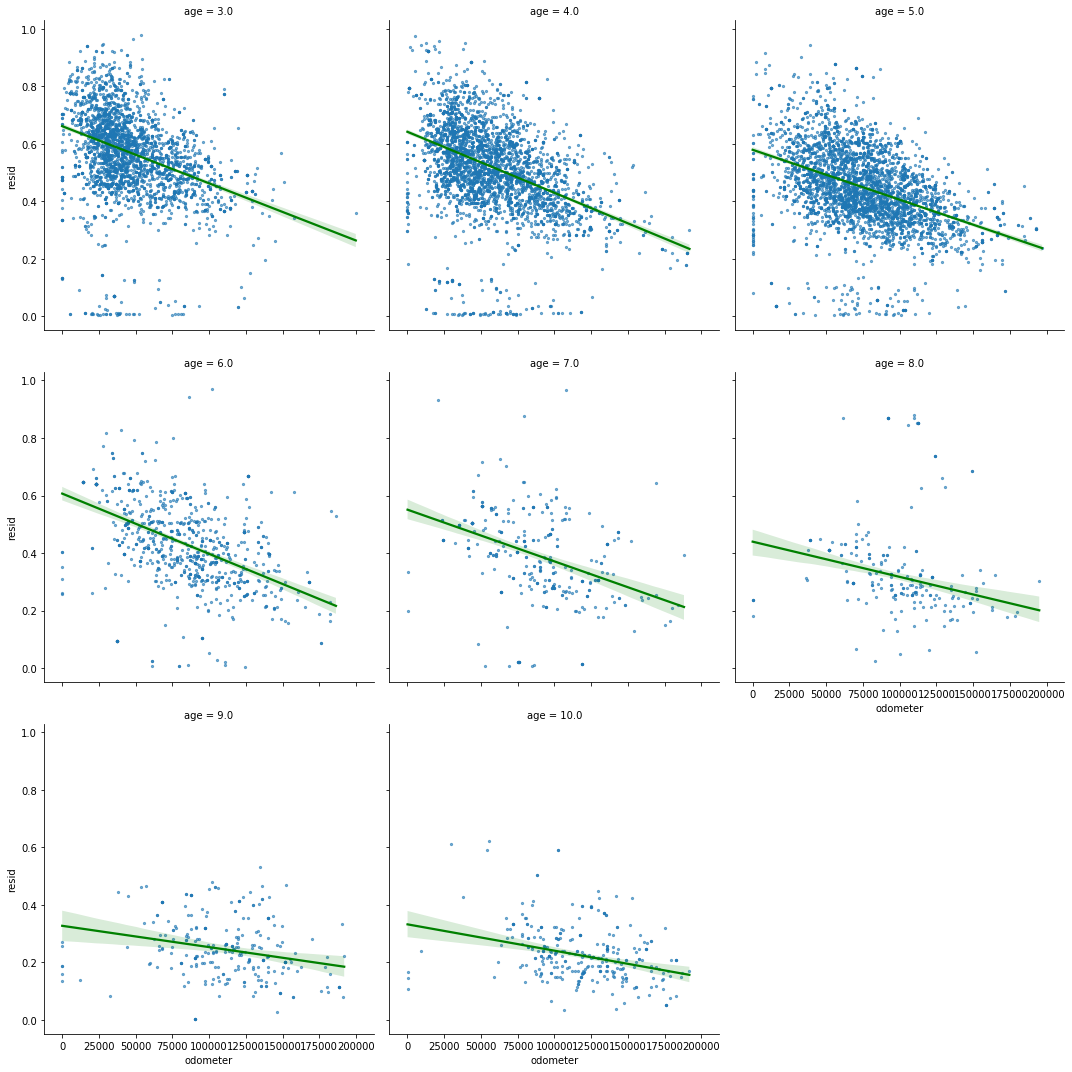

In [40]:
z2= z2[z2['resid']<1]
g = sns.lmplot(x= 'odometer', y='resid', data=z2,  col="age", robust=True, col_wrap=3, scatter_kws={"alpha":.6, "s": 5}, line_kws={'color': 'green'} )


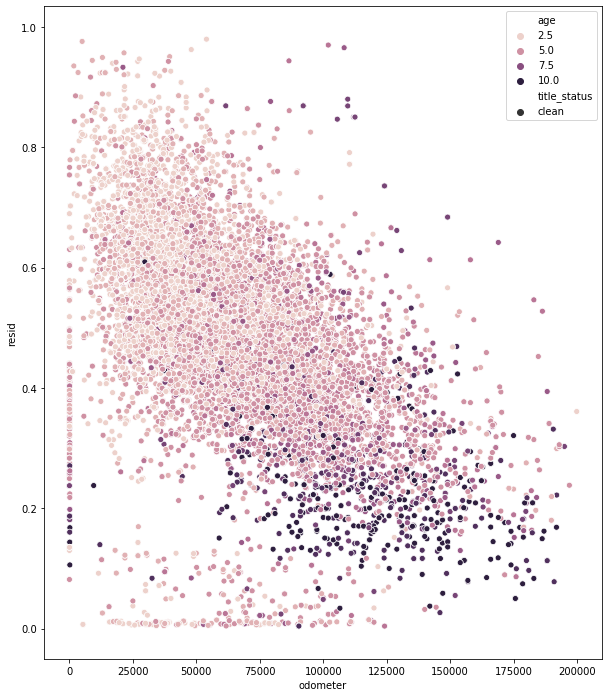

In [43]:
#scatter resid vs odometer
#scatter price vs msrp
z2= z2[z2['odometer']<200000]
c = len(z1.age.unique())
palette_C = sns.color_palette("colorblind", 6)

plt.figure(figsize=(10 ,12))
sns.scatterplot(x='odometer', y='resid', hue= 'age', style='title_status', data=z2)
plt.show()

### Note:
* Relationship between odometer and residuak is strong there seems to be a lower cluster can't figure that out
* The ir are no age striations which was unexpected

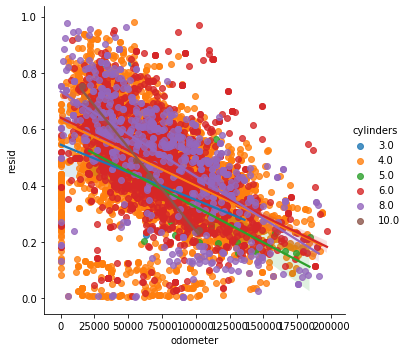

In [44]:
g = sns.lmplot(x= 'odometer', y='resid', data=z2, hue='cylinders')

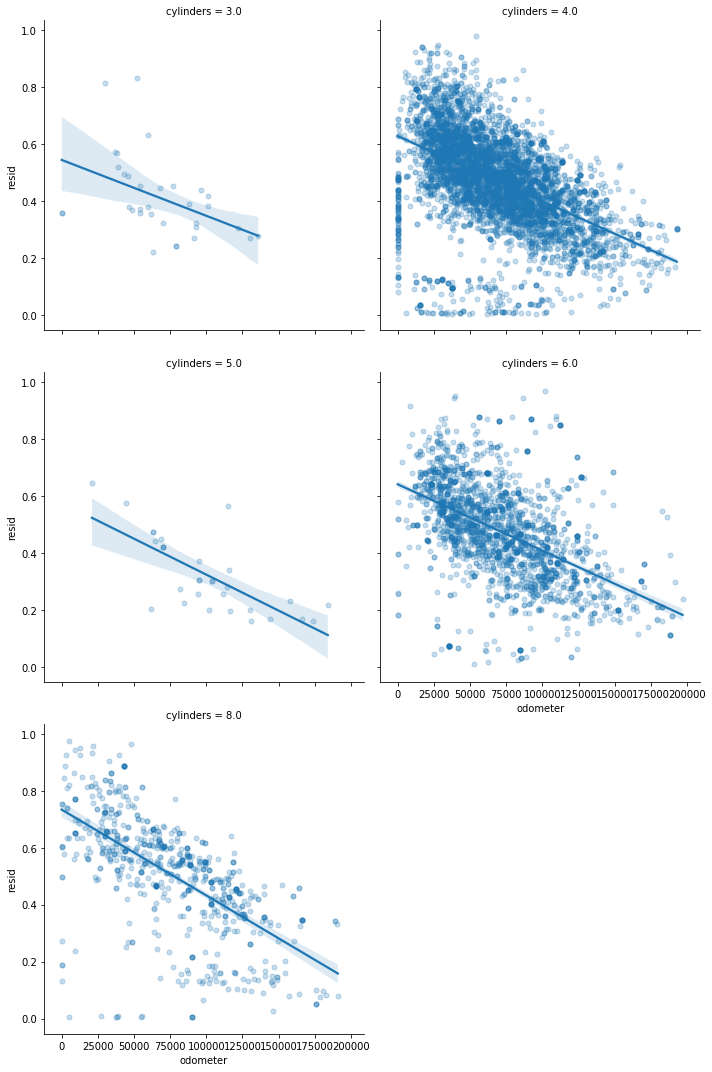

In [45]:
z2=z2[z2['resid']<1]
z2=z2[z2['cylinders']<10]
g = sns.lmplot(x= 'odometer', y='resid', col= 'cylinders', col_wrap=2,  data=z2, scatter_kws={'alpha':0.25, 's':25 } )

### Residual vs Odometer vs Cylinders

* Linear Relationshiop i stronger once cylinders invited especially for cylinder 8 and 6
* Possible also true for 4 but something odd there almost a circle around a triangle
* cylinder 4 shows the most common combo with linear relationship plust lower cluster


C:\Users\Tiki\anaconda\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


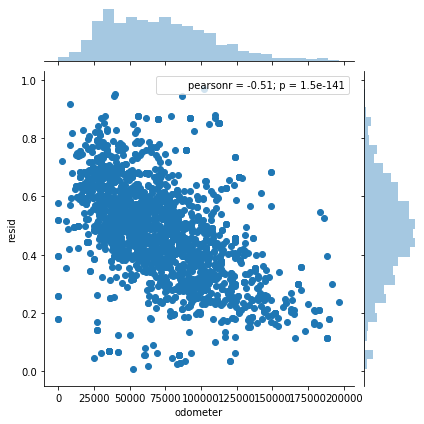

In [46]:
z6= z2[z2['cylinders']==6]
g = sns.jointplot(x= 'odometer', y='resid',data=z6, stat_func=pearsonr)
_ = g.title = 'Residual vs Mileage for cylinde 8'
plt.show()
##so residual

C:\Users\Tiki\anaconda\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


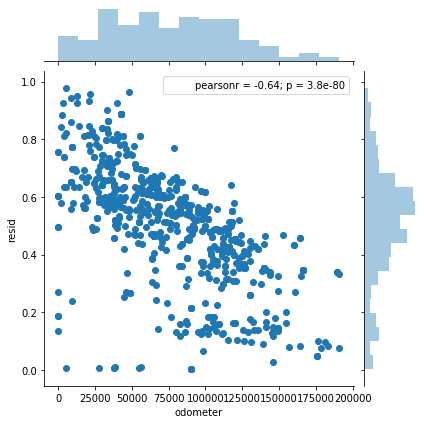

In [47]:
z6= z2[z2['cylinders']==8]
g = sns.jointplot(x= 'odometer', y='resid',data=z6, stat_func=pearsonr)
_ = g.title = 'Residual vs Mileage for cylinde 8'
plt.show()


In [48]:
### Why the noise cylinders, residual odometer
#### Checking if due to age

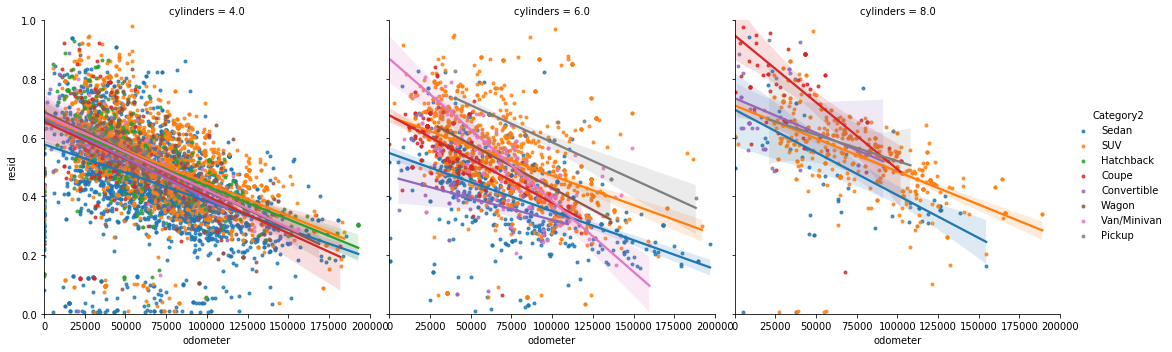

In [49]:
## could the outside mix due to age
#string replace
z5= auto_data[auto_data['title_status']=='clean']
z5= auto_data1[auto_data1['age']<9]
z5= z5[['odometer', 'price', 'resid', 'cylinders', 'Category2']].dropna()
z5= z5[z5['odometer']<200000]
z5= z5[z5['price']<100000]
z5 = z5.drop(z5[(z5['cylinders'] == 6) & (z5['Category2'] == 'Hatchback')].index)

z5 =z5[z5['cylinders']!= 3]
z5 =z5[z5['cylinders']!= 5]
z5 =z5[z5['cylinders']!= 10]
z5.groupby([ 'cylinders', 'Category2']).agg({'resid': 'count'})
g = sns.lmplot(x= 'odometer', y='resid', col= 'cylinders', col_wrap=3, truncate=True, hue= 'Category2', order=1, markers='.' , data=z5)
g = (g.set(xlim=(0, 200000), ylim=(0, 1)))


In [50]:
z5= auto_data[auto_data['title_status']=='clean']
z5= z5[z5['age']<9]
z5= z5[z5['odometer']<200000]
z5= z5[z5['price']<100000]

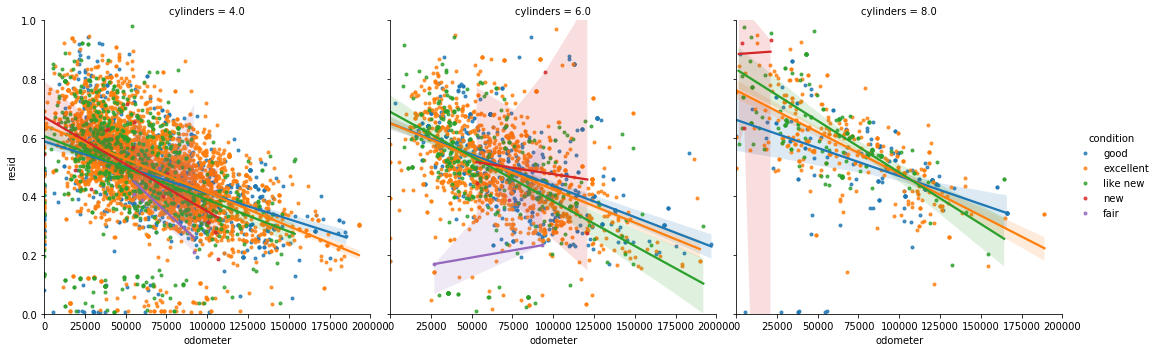

In [51]:
## could the outside mix due to age
#string replace
z5= auto_data[auto_data['title_status']=='clean']
z5= z5[z5['age']<9]
z5= z5[['odometer', 'price', 'resid', 'condition', 'cylinders']].dropna()
z5= z5[z5['odometer']<200000]
z5= z5[z5['price']<100000]
z5 =z5[z5['cylinders']!= 3]
z5 =z5[z5['cylinders']!= 5]
z5 =z5[z5['cylinders']!= 10]
z5.groupby([ 'cylinders', 'condition']).agg({'resid': 'count'})
g = sns.lmplot(x= 'odometer', y='resid', col= 'cylinders', col_wrap=3, truncate=True, hue= 'condition', order=1, markers='.' , data=z5)
g = (g.set(xlim=(0, 200000), ylim=(0, 1)))


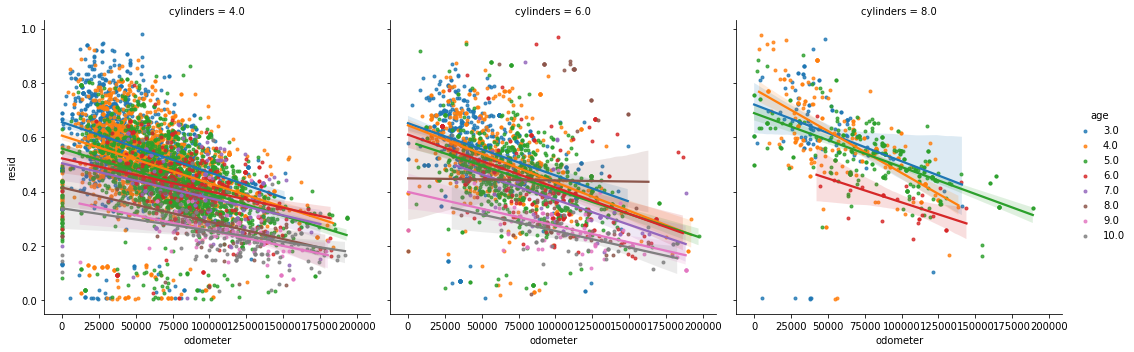

In [52]:
z4 = z2.drop(z2[(z2['cylinders'] == 8) & (z2['age'] >6)].index)
z4=z4[z4['cylinders'] != 5]
z4=z4[z4['cylinders'] != 3]
z4.groupby(['cylinders', 'age']).agg({'resid': 'count'})
g = sns.lmplot(x= 'odometer', y='resid', col='cylinders', hue='age', markers='.'  ,data=z4)

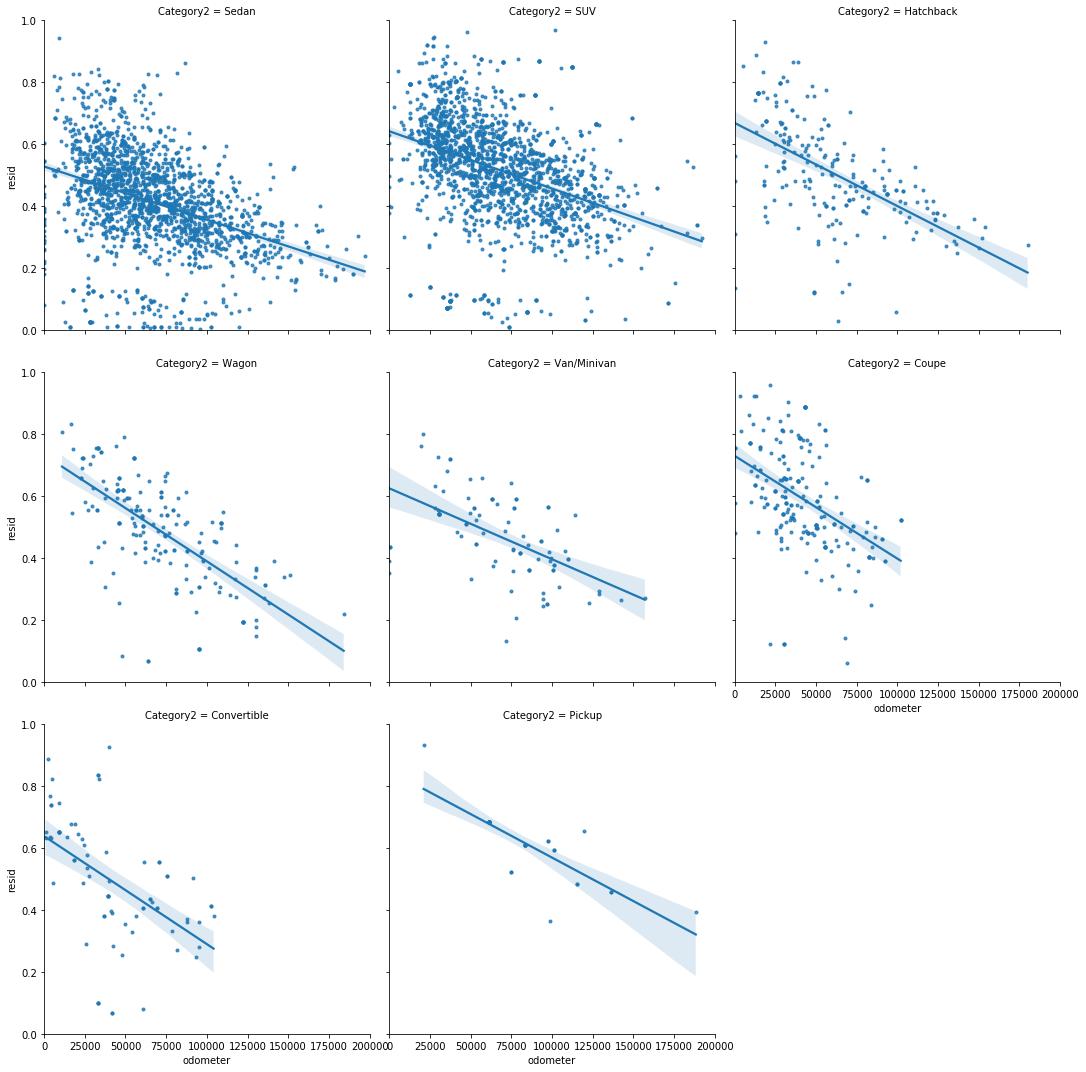

In [53]:

#string replace
z2= z1[z1['age']<9]
z2= z2[z2['odometer']<200000]
z2= z2[z2['resid']<1]
z2['Category2']= z2['Category'].str.strip().str.split(', ').str[0]
g = sns.lmplot(x= 'odometer', y='resid', col= 'Category2', col_wrap=3, markers='.' ,  data=z2)
g = (g.set(xlim=(0, 200000), ylim=(0, 1)))


In [54]:
#Category shows a strong relationshio with data and odometer residual. That's good to see

In [55]:
auto_data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long', 'age', 'modelx', 'mmy_a', 'model2', 'mmy_a2', 'Category',
       'MSRP', 'resid', 'Category2'],
      dtype='object')

### Price vs Odometer by...

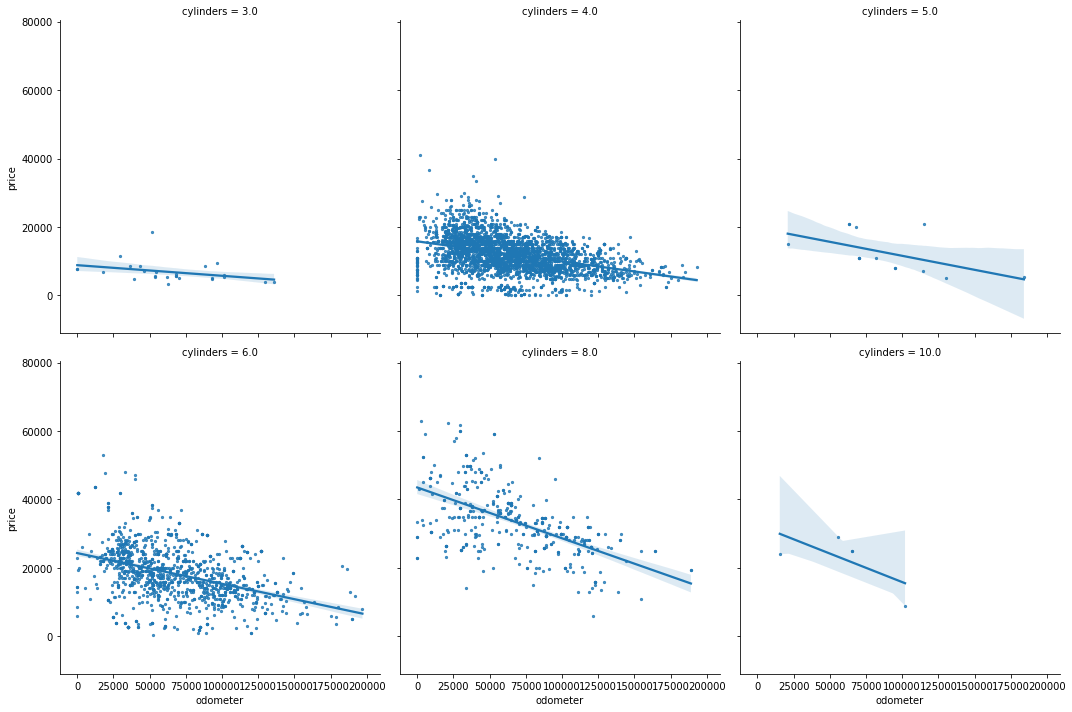

In [58]:

z= auto_data[['Category', 'type', 'cylinders', 'condition','fuel', 'size', 'drive', 'title_status', 'odometer', 'price', 'MSRP', 'age', 'resid']]
z= z[z.price<100000]
z= z[z.odometer<200000]
z1 = z.dropna()

z2= z1[z1['age']<9]

g = sns.lmplot(x= 'odometer', y='price', data=z2,  col="cylinders", col_wrap=3, scatter_kws={'s':5} )

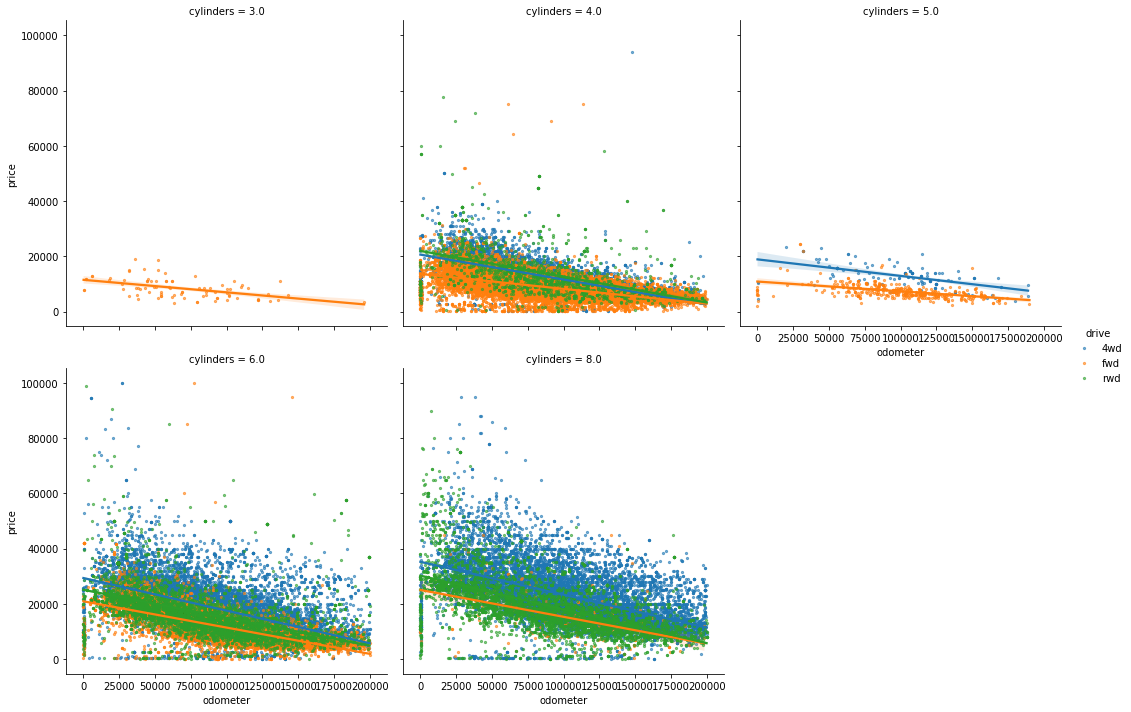

In [59]:
auto_data1= auto_data[auto_data['title_status']=='clean']
z2= auto_data1[auto_data1['age']<11]
z2= auto_data1[auto_data1['age']>2]
z2= z2[z2['odometer']<200000]
z2= z2[z2['price']<100000]

z2 = z2.drop(z2[(z2['cylinders'] == 3) & (z2['drive'] == 'rwd')].index)
z2 = z2.drop(z2[(z2['cylinders'] == 3) & (z2['drive'] == '4wd')].index)
z2 = z2.drop(z2[(z2['cylinders'] == 5) & (z2['drive'] == 'rwd')].index)
z2 =z2[z2['cylinders']< 9]


g = sns.lmplot(x= 'odometer', y='price', data=z2,  col="cylinders", hue='drive', col_wrap=3, scatter_kws={"alpha":.6, "s": 5})


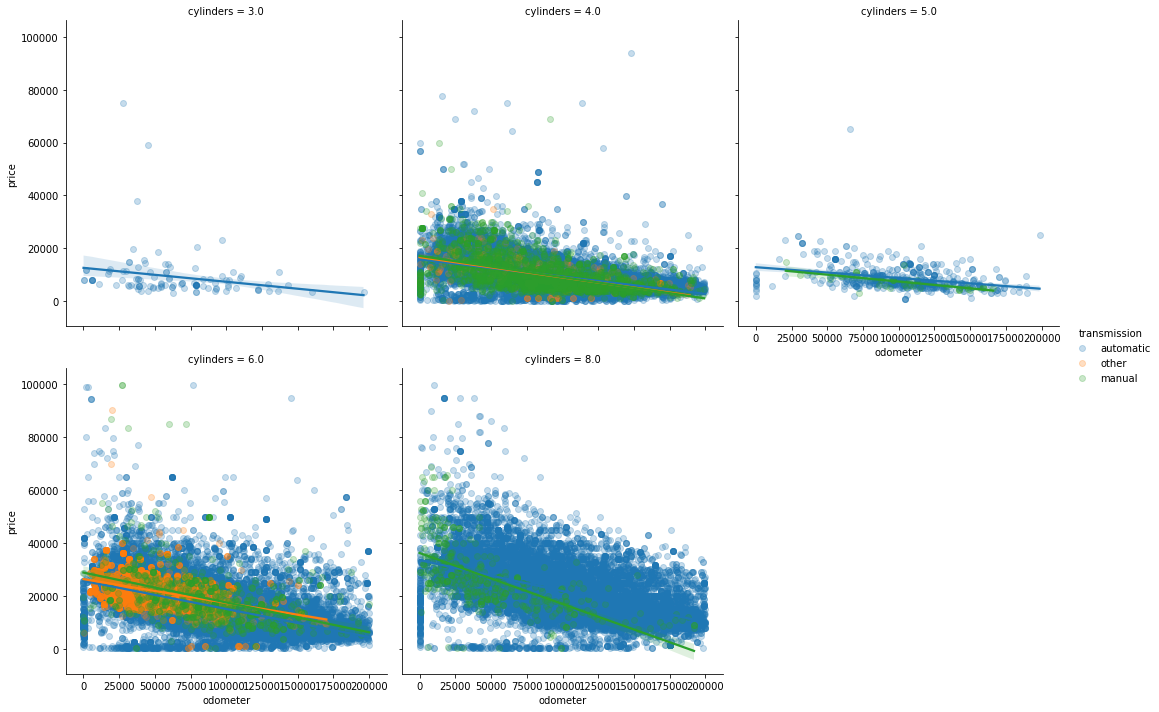

In [60]:
auto_data1= auto_data[auto_data['title_status']=='clean']
z2= auto_data1[auto_data1['age']<11]
z2= auto_data1[auto_data1['age']>2]
z2= z2[z2['odometer']<200000]
z2= z2[z2['price']<100000]
z2 = z2.drop(z2[(z2['cylinders'] == 5) & (z2['transmission'] == 'other')].index)
z2 = z2.drop(z2[(z2['cylinders'] == 8) & (z2['transmission'] == 'other')].index)
z2 = z2.drop(z2[(z2['cylinders'] == 3) & (z2['transmission'] == 'other')].index)
z2 = z2.drop(z2[(z2['cylinders'] == 3) & (z2['transmission'] == 'manual')].index)
z2 =z2[z2['cylinders']< 9]
#z2 = z2.drop(z2[(z2['cylinders'] == 3) & (z2['drive'] == 'rwd')].index)
#z2 = z2.drop(z2[(z2['cylinders'] == 3) & (z2['drive'] == '4wd')].index)
#z2 = z2.drop(z2[(z2['cylinders'] == 5) & (z2['transmission'] == 'other')].index)


#z2.groupby([ 'transmission', 'cylinders']).agg({'resid': 'count'})

g = sns.lmplot(x= 'odometer', y='price', data=z2,  col="cylinders", hue= 'transmission', col_wrap=3, scatter_kws= {'alpha': 0.25} )

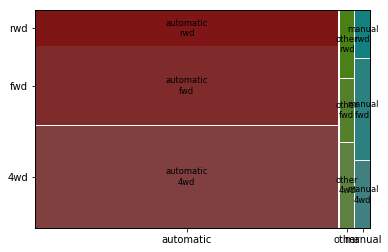

In [63]:
#from pandas.api.types import CategoricalDtype
#z2['Transmission_categorory'] = CategoricalDtype(categories=z2['transmission'], ordered=True)


#z2.groupby([ 'cylinders', 'transmission', 'drive']).agg({'resid': 'count'})

from statsmodels.graphics.mosaicplot import mosaic
mosaic(z2, ['transmission', 'drive'])
plt.show()


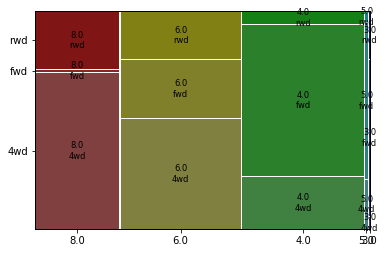

In [64]:
mosaic(z2, ['cylinders', 'drive'])
plt.show()

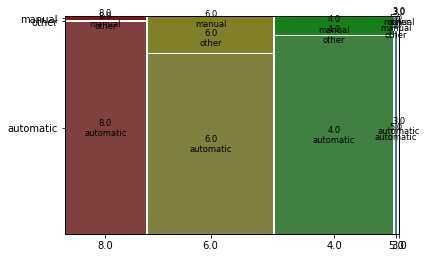

In [65]:
mosaic(z2, ['cylinders', 'transmission'])
plt.show()

<Figure size 1008x864 with 0 Axes>

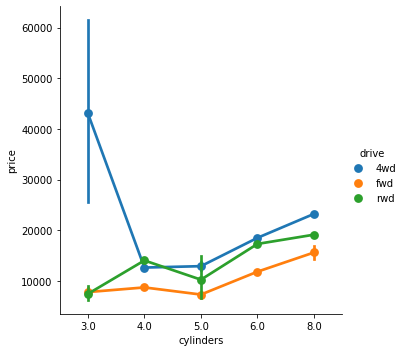

In [66]:
plt.figure(figsize=(14,12))
sns.catplot(x="cylinders", y="price", hue='drive', kind='point', data=z2)
plt.show()

### Notes
* strong corelationas noted before  cylinders, Mileage, msrp, residual, age
* Drive takes a central position as well
* Category also has a stong corelation between Residual 
* Outliers price and mileage might still be there
* Similarly cylinders, MSRP, price
* There is a lower cluser stil no idea what it does but there its pretty obvious one it but it does not appear to be related condition or category

### Categorical relationship

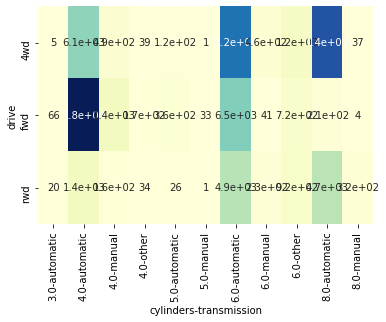

In [68]:
sns.heatmap(pd.crosstab([ z2.drive], [z2.cylinders, z2.transmission]),
            cmap="YlGnBu", annot=True, cbar=False)



In [73]:
auto_data1= auto_data[auto_data['title_status']=='clean']
z2= auto_data1[auto_data1['age']<11]
z2= auto_data1[auto_data1['age']>2]
z2= z2[z2['odometer']<200000]
z2= z2[z2['price']<100000]
z2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118625 entries, 0 to 142137
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            118625 non-null  int64  
 1   region        118625 non-null  object 
 2   price         118625 non-null  int64  
 3   year          118625 non-null  float64
 4   manufacturer  116236 non-null  object 
 5   model         118625 non-null  object 
 6   condition     118625 non-null  object 
 7   cylinders     87227 non-null   float64
 8   fuel          118620 non-null  object 
 9   odometer      118625 non-null  float64
 10  title_status  118625 non-null  object 
 11  transmission  118529 non-null  object 
 12  vin           87576 non-null   object 
 13  drive         99233 non-null   object 
 14  size          48080 non-null   object 
 15  type          106046 non-null  object 
 16  paint_color   98365 non-null   object 
 17  description   118623 non-null  object 
 18  stat

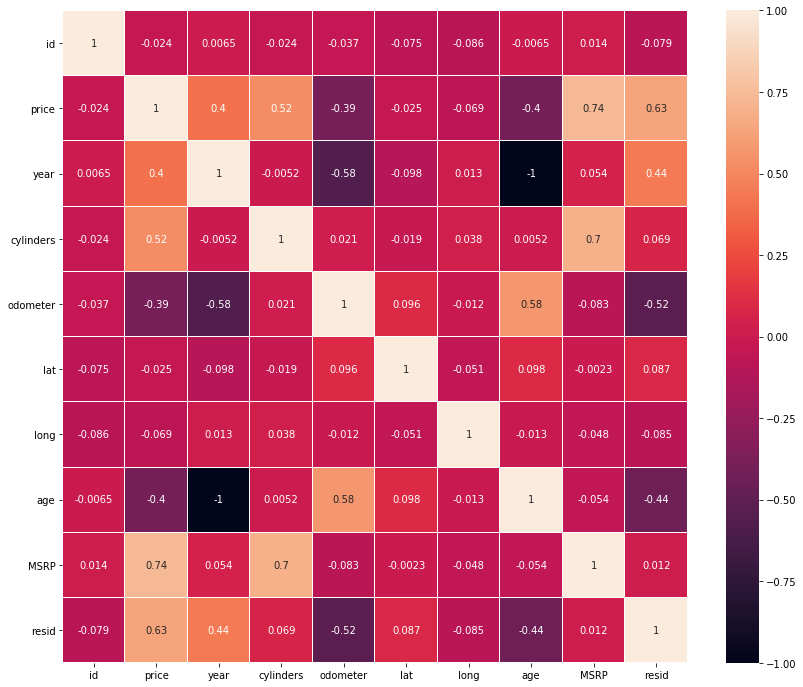

In [74]:
plt.figure(figsize=(14,12))
sns.heatmap(z2.corr(),linewidths=.1, annot=True)
plt.yticks(rotation=0);
plt.savefig('correlation',bbox_inches='tight')


In [ ]:
#Save data as new file
new_file = 'auto_data_complete2.csv'
new_file_name_path = os.path.join(basepath,sub_file, new_file)
z2.to_csv(new_file_name_path, index=False)